# 7.1. Exploring a dataset with pandas and matplotlib

In [1]:
from datetime import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
player = 'Roger Federer'
df = pd.read_csv('https://github.com/ipython-books/'
                 'cookbook-2nd-data/blob/master/'
                 'federer.csv?raw=true',
                 parse_dates=['start date'],
                 dayfirst=True)

In [3]:
df.head(3)

,year,tournament,start date,type,surface,draw,atp points,atp ranking,tournament prize money,round,...,player2 2nd serve return points total,player2 break points converted won,player2 break points converted total,player2 return games played,player2 total service points won,player2 total service points total,player2 total return points won,player2 total return points total,player2 total points won,player2 total points total
0,1998,"Basel, Switzerland",1998-10-05,WS,Indoor: Hard,Draw: 32,1,396.0,"$9,800",R32,...,22.0,4.0,8.0,8.0,36.0,50.0,26.0,53.0,62.0,103.0
1,1998,"Toulouse, France",1998-09-28,WS,Indoor: Hard,Draw: 32,59,878.0,"$10,800",R32,...,19.0,0.0,1.0,8.0,33.0,65.0,8.0,41.0,41.0,106.0
2,1998,"Toulouse, France",1998-09-28,WS,Indoor: Hard,Draw: 32,59,878.0,"$10,800",R16,...,30.0,0.0,4.0,10.0,46.0,75.0,23.0,73.0,69.0,148.0


In [4]:
df['win'] = df['winner'] == player
df['win'].tail()

1174    False
1175     True
1176     True
1177     True
1178    False
Name: win, dtype: bool

In [5]:
won = 100 * df['win'].mean()
print(f"{player} has won {won:.0f}% of his matches.")

Roger Federer has won 82% of his matches.


In [6]:
date = df['start date']

In [7]:
df['dblfaults'] = (df['player1 double faults'] /
                   df['player1 total points total'])

In [8]:
df['dblfaults'].tail()

1174    0.018116
1175    0.000000
1176    0.000000
1177    0.011561
1178         NaN
Name: dblfaults, dtype: float64

In [9]:
df['dblfaults'].describe()

count    1027.000000
mean        0.012129
std         0.010797
min         0.000000
25%         0.004444
50%         0.010000
75%         0.018108
max         0.060606
Name: dblfaults, dtype: float64

In [10]:
df.groupby('surface')['win'].mean()

surface
Indoor: Carpet    0.736842
Indoor: Clay      0.833333
Indoor: Hard      0.836283
Outdoor: Clay     0.779116
Outdoor: Grass    0.871429
Outdoor: Hard     0.842324
Name: win, dtype: float64

In [11]:
gb = df.groupby('year')

AttributeError: type object 'datetime.datetime' has no attribute 'astype'

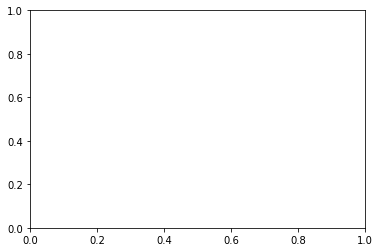

In [19]:
fig, ax = plt.subplots(1, 1)
ax.plot_date(datetime.astype(datetime), df['dblfaults'],
             alpha=.25, lw=0)
ax.plot_date(gb['start date'].max().astype(datetime),
             gb['dblfaults'].mean(), '-', lw=3)
ax.set_xlabel('Year')
ax.set_ylabel('Double faults per match')
ax.set_ylim(0)